In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
def root(A):
    num_node = A.shape[0]
    root1 = np.random.randint(num_node) 
    root1_neighbor = np.nonzero(A[root1])[0]
    root2 = np.random.choice(root1_neighbor)
    return num_node,root1,root2

def neighbors(A,node):
    return np.nonzero(A[node])[0]

def new_root(L):
    return np.random.choice(L)

def generate_random_Ad(show_graph=False):
    _G = nx.erdos_renyi_graph(30, 0.1, seed=None, directed=False)
    Gcc = sorted(nx.connected_components(_G), key=len, reverse=True)
    G = _G.subgraph(Gcc[0])
    Ad = nx.adjacency_matrix(G, nodelist=G.nodes)
    Ad = Ad.todense()
    G = nx.convert_matrix.from_numpy_matrix(Ad)
    if show_graph:
        nx.draw(G, with_labels=True)
        plt.show()
    tol = 1e-8
    isSymmetry = np.all(np.abs(Ad-Ad.T) < tol)
    #print("Adjacency matrix Ad is symmetric: ", isSymmetry)
    return Ad

def draw_colored_graph(Ad, class_0, class_1):
    G = nx.convert_matrix.from_numpy_matrix(Ad)
    color_list = []
    for node in G.nodes:
        if node in class_0:
            color_list.append("red")
        elif node in class_1:
            color_list.append("blue")
        else:
            color_list.append("black")
    options = {
        'node_color': color_list,
        'node_size': 20,
        'width': 1,
        'with_labels': True,
    }
    nx.draw(G, **options)
    plt.show()


In [4]:
def draw_3d_scatter(attributes, class_0, class_1):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    array_0 = attributes[class_0,:]
    array_1 = attributes[class_1,:]
    ax.scatter(array_0[:,0],array_0[:,1],array_0[:,2], marker='^', color='r')
    ax.scatter(array_1[:,0],array_1[:,1],array_1[:,2], marker='o', color='b')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('x3')
    plt.show()

In [22]:
def sub_graph(A):
    num_node,root1,root2=root(A)
    class_1=[root1]
    class_2=[root2]
    frontier_1=[root1]
    frontier_2=[root2]
    #print(root1,root2)
    while len(frontier_1)!= 0 and len(frontier_2)!=0:
        root_1 = new_root(frontier_1)
        frontier_1= list(set(frontier_1)-set([root_1]))
        #print(neighbors(A,root_1))
        neighbor_1 = list(set(neighbors(A,root_1))-set(class_2)-set(class_1))
        class_1.extend(neighbor_1)
        frontier_1 = list(set(frontier_1)|set(neighbor_1))


        root_2 = new_root(frontier_2)
        frontier_2= list(set(frontier_2)-set([root_2]))
        neighbor_2 = list(set(neighbors(A,root_2))-set(class_1)-set(class_2))
        class_2.extend(neighbor_2)
        frontier_2 = list(set(frontier_2)|set(neighbor_2))
        #print(class_1,class_2)

    all_node=[i for i in range(num_node)]
    if len(frontier_1)==0:
        class_2 = list(set(all_node)-set(class_1))
    if len(frontier_2)==0:
        class_1 = list(set(all_node)-set(class_2))

    return class_1,class_2


In [26]:
def attribute(mu1,mu2,sigma,class1,class2):
    attribute=np.zeros([len(class1)+len(class2),len(mu1)])
    #print(class1,class2)
    #print(len(class1)+len(class2))
    for i in range(len(class1)):
        attribute[class1[i]]=np.random.multivariate_normal(mu1, sigma, 1, 'raise')
    for i in range(len(class2)):
        attribute[class2[i]]=np.random.multivariate_normal(mu2, sigma, 1, 'raise') 
    return attribute

In [29]:
def generator(A,mu1,mu2,sigma):
    class1,class2=sub_graph(A)
    ww=attribute(mu1,mu2,sigma,class1,class2)
    draw_colored_graph(A, class1, class2)
    draw_3d_scatter(ww,class1,class2)
    lb = [int(i in class2) for i in range(len(class1)+len(class2))]
    return ww,lb

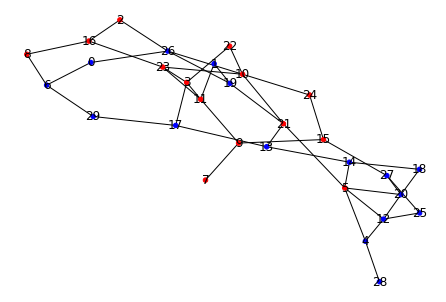

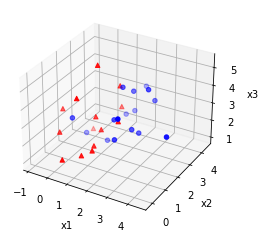

[[ 1.86246274  3.2152455   3.71782107]
 [ 0.0159886   2.32788647  1.30212244]
 [ 0.71838775  2.20449089  5.42954668]
 [ 0.52589974  0.95241951  4.307259  ]
 [ 0.0668211   1.25306576  2.88045601]
 [ 1.09214557  3.46000109  2.43476572]
 [ 2.68714067  3.60849652  3.19252527]
 [-0.85206068  1.83030627  2.73255921]
 [-0.45566686  1.04020033  2.0352219 ]
 [ 1.22837865  1.14160747  1.7434987 ]
 [-0.18251564  3.12289402  0.94161373]
 [ 0.53919784 -0.15433326  1.60779128]
 [ 4.47044706  1.65163669  3.00807306]
 [ 1.71494584  4.46092651  3.18931197]
 [ 2.1812242   1.26300901  2.33377274]
 [ 2.04587373  1.74893951  2.99436702]
 [ 1.27639283  3.05567456  3.9408215 ]
 [ 2.55927632  1.99643097  2.54301129]
 [ 1.2727526   3.53330591  2.00530184]
 [ 2.70090006  0.73975245  4.01553175]
 [ 1.6544345   2.69243246  4.19680934]
 [ 1.05613767  0.47540357  1.58788127]
 [ 0.76669719  1.9623527   2.71199732]
 [ 1.46776141  0.66844229  1.8736003 ]
 [ 1.0363461   1.96511707  2.05694338]
 [ 1.61883675  3.69464574

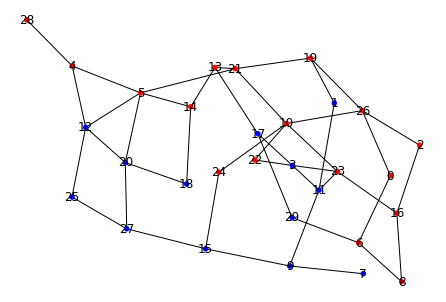

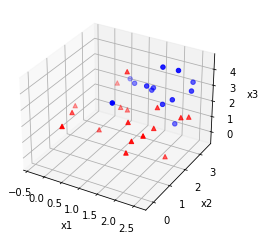

[[ 2.13610753  0.86861758  2.002789  ]
 [ 2.28911793  2.65943193  4.51350102]
 [ 1.73329752  0.73260815  0.79965576]
 [ 1.50645426  2.79763498  2.70539048]
 [ 0.74111504  2.53038586  1.36239211]
 [ 2.01739346  1.79412963  1.52203239]
 [ 1.52550246  1.30203306  2.03491086]
 [ 2.00405364  2.35858949  2.50751848]
 [ 0.87333049  2.66825558  1.15570535]
 [ 2.50338527  3.04416997  3.04589812]
 [ 0.41507433 -0.18816356  2.44174238]
 [ 1.91239105  2.54749301  4.59239727]
 [ 1.53636491  2.40234803  3.32331677]
 [ 2.53189422  2.31777988  2.05006876]
 [ 1.89896073  2.27757106  2.31454577]
 [ 1.19969145  1.06367442  3.242959  ]
 [ 2.23020181  2.06548609 -0.41011292]
 [ 1.55706264  2.78769637  2.88815847]
 [ 0.64758179  3.32206471  2.45249304]
 [ 0.28625106  3.28678815  1.99507403]
 [ 2.36807236  3.47172118  3.14896086]
 [ 2.60354007  2.66986373  1.80733908]
 [ 0.49207256  1.73869583  0.47215748]
 [-0.0074636   1.17670972  1.77631596]
 [-0.3871973   2.09339291  1.14663419]
 [ 0.95236081  2.93864353

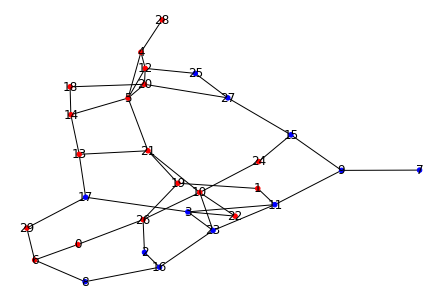

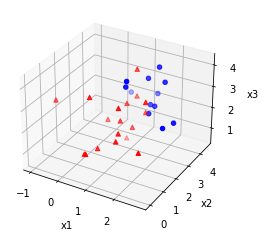

[[ 9.05746606e-01  2.91174545e+00  2.45226189e+00]
 [-9.82914365e-01  1.50899044e+00  2.66011693e+00]
 [ 1.85432158e+00  2.53525039e+00  2.52453135e+00]
 [ 2.11582500e+00  3.19025091e+00  3.72976157e+00]
 [ 1.32017923e+00  1.40359298e+00  3.18378642e+00]
 [ 5.77437153e-01  4.45618768e-01  1.30483430e+00]
 [ 1.45550839e+00  9.22062120e-01  1.96053834e+00]
 [ 1.37924861e+00  4.31716779e+00  2.35098244e+00]
 [ 1.40066236e+00  1.82871129e+00  4.20887791e+00]
 [ 2.84983469e-01  4.57335914e+00  1.88604722e+00]
 [ 1.87624412e+00  2.24367511e+00  3.21419441e+00]
 [ 1.27026484e+00  2.04479015e+00  3.79700119e+00]
 [ 8.50606530e-01  2.27301266e-03  1.67102864e+00]
 [ 8.65156995e-01  8.17596117e-01  1.47056233e+00]
 [ 9.35688475e-01  3.62763567e+00  2.43294290e+00]
 [ 2.80618961e+00  2.32526340e+00  2.56778828e+00]
 [ 1.84598058e+00  3.34263287e+00  4.25011438e+00]
 [ 1.52057227e+00  3.22080558e+00  3.68378722e+00]
 [ 1.38916496e+00  1.24088847e+00  2.12459260e+00]
 [ 3.72897884e-01  1.26881842e+

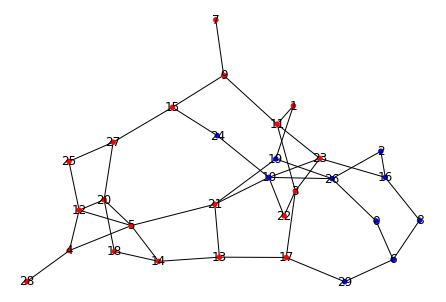

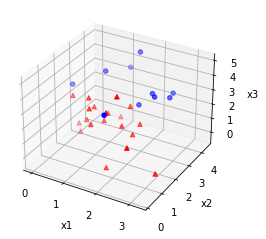

[[ 2.57378     3.96571992  2.82440492]
 [ 0.65263913  2.18425737  1.28197193]
 [ 1.05121963  4.41258514  3.34914878]
 [ 1.17210376  2.25333796  1.48754021]
 [ 0.9128556   1.79572398  3.27890829]
 [ 3.25203894  1.07953311  0.28410234]
 [ 2.0315053   2.75214656  2.6953074 ]
 [ 1.07387265  2.7464901   1.50770416]
 [-0.02454051  2.68497826  2.91285163]
 [ 1.76321278  1.10311346  3.39201995]
 [ 2.32485084  3.02677788  3.41419394]
 [ 2.72021477  0.35193207  2.35037745]
 [ 0.18807721  2.25350225  2.61268764]
 [ 0.20466366  2.59071338  0.38993687]
 [ 1.08505395  1.54648201  1.77799584]
 [ 1.16558779  3.43968398  0.7163815 ]
 [ 2.74273789  3.29319598  3.17139024]
 [ 2.22113201  2.39990311  1.7871039 ]
 [ 2.18259314  1.97276021  1.42698173]
 [ 1.54868961  3.95538402  5.04367859]
 [ 1.06138226  1.50328457  2.87961249]
 [ 1.73881282  1.15014959 -0.42662283]
 [ 0.30844688  2.47799263 -0.03454642]
 [ 1.79965724  2.6857322   2.50570237]
 [ 2.13021246  0.18471733  4.26706767]
 [ 1.82290035  2.03303511

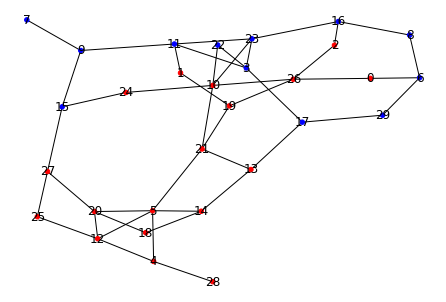

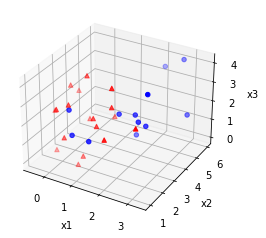

[[ 0.4281409   1.69346821  3.01247009]
 [-0.14135095  1.88191616  0.29101501]
 [ 1.77085634  2.14365773  4.15844309]
 [ 3.34958764  4.70720599  2.02362268]
 [ 0.71093308  1.76181919 -0.05063617]
 [ 2.02826134  0.97846765  2.30611386]
 [ 2.83870773  2.54124234  4.06347785]
 [ 1.75350766  2.7555534   2.49570487]
 [ 0.45966073  1.6678702   2.77685638]
 [ 2.62891632  2.91764494  2.14334498]
 [ 1.36895661  3.26984905  1.91623543]
 [ 1.37477384  1.20817561  1.79622975]
 [ 2.94266377  1.35710345  3.05530975]
 [-0.0616393   2.88337926  3.20011076]
 [ 1.38999191  1.77819099  2.25830656]
 [ 2.04531788  5.9380839   3.40252726]
 [ 2.07364827  3.44539665  1.14000918]
 [ 2.21524111  3.01053069  2.50149409]
 [-0.49795402  2.53093531  1.88018194]
 [ 0.39711663  1.3890505   1.46029999]
 [-0.01060176  3.4045325   2.66518974]
 [ 1.1832597   1.97402079  2.46773788]
 [ 2.43678726  2.74465495  2.37628904]
 [ 2.70182468  5.95936755  4.00214251]
 [ 0.16740003  1.31707788  2.88051485]
 [ 0.66171852  2.82315514

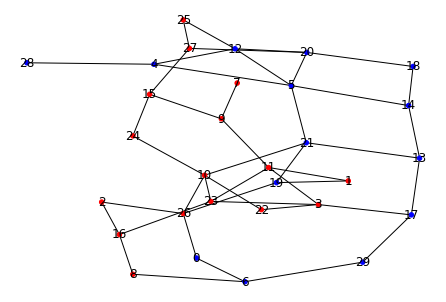

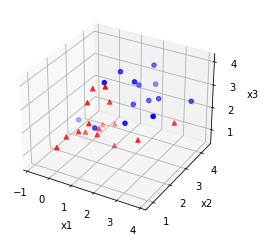

[[ 2.22765907  3.44802044  2.51605244]
 [ 0.55355184  1.55502269  1.92213831]
 [ 0.48022379  3.71817435  0.78455339]
 [ 1.07804662  1.49108387  2.46613141]
 [ 3.69351276  1.67845836  3.40256655]
 [ 2.64765737  3.46758286  2.70015481]
 [ 1.6327668   3.64675814  2.91028044]
 [-0.02013363  3.62539817  0.6826795 ]
 [ 3.52499268  3.22543414  2.03805424]
 [ 0.09850323  1.42928292  1.64558263]
 [ 1.17197936  2.80271978  0.62251695]
 [ 0.10175305  2.47005085  1.14809246]
 [-0.83467914  3.21187732  0.93331286]
 [ 1.52350871  2.69811458  4.03822407]
 [ 1.86000589  3.01136216  2.52739854]
 [ 1.13121317  1.87492379  1.74713859]
 [ 0.69765252  2.18662771  3.41187099]
 [ 1.47001785  1.86804775  4.07301589]
 [ 2.27267945  2.5222776   3.91356829]
 [ 3.889267    3.72038522  2.76943076]
 [ 1.86077794  4.36989852  2.56254606]
 [ 1.97717558  4.08371668  3.60364573]
 [ 2.70501946  2.1682192   1.77278761]
 [ 1.13468906  2.58141742  2.70572398]
 [ 0.74225928  2.44704922  1.50624173]
 [ 0.16699293  0.83919281

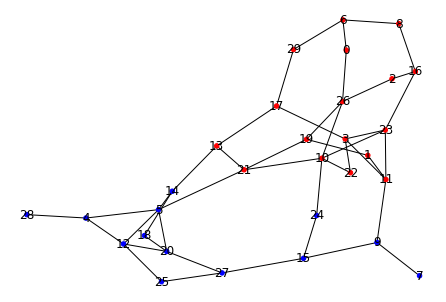

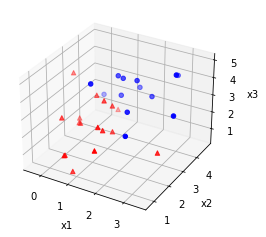

[[ 1.53453949  1.7447891   2.4358228 ]
 [ 0.35217777  2.37342937  1.81907146]
 [ 1.27318028  2.83495742  2.8980207 ]
 [ 0.10193541  2.73980669  1.72694227]
 [ 1.30500967  3.36703589  3.13396106]
 [ 1.85973251  3.39859153  4.19328935]
 [-0.3723177   3.19523885  3.8355583 ]
 [ 3.20041207  3.47155336  5.02616574]
 [ 1.51468007  1.47971102  2.8175269 ]
 [ 3.47900381  2.77393056  3.37496037]
 [ 1.80945155  0.75309183  2.20878073]
 [ 1.49122441  2.44940959  1.79328968]
 [ 2.24201099  3.70586335  3.22276243]
 [ 0.70852796  0.80573275  1.37593087]
 [ 2.37480128  1.68549407  2.55784912]
 [ 0.89818018  2.12632399  4.50407264]
 [ 0.09564063  1.65266869  2.56887599]
 [ 0.65419792  2.91603596  3.17640846]
 [ 1.59873772  4.09356125  3.19071582]
 [ 0.55230053  0.99941293  1.10738892]
 [ 1.21345711  3.33152127  4.23967577]
 [ 0.26711062  2.43244301  1.76405672]
 [ 0.91453781  0.9122924   0.43791666]
 [ 3.19989839  2.27629278  1.52433781]
 [ 2.04437442  2.41443644  3.206294  ]
 [ 2.63890866  4.76366324

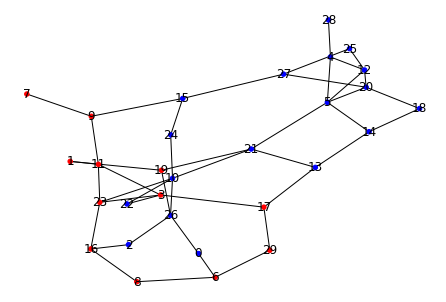

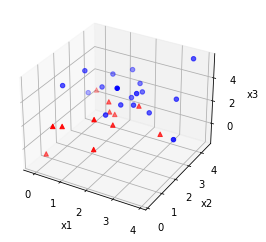

[[ 0.42342411  2.57563114  4.49504289]
 [ 2.26328017  3.03014235  2.11942349]
 [ 2.21055332  3.36872166  2.95875748]
 [ 0.31063749  3.54555543  1.75652888]
 [ 3.57684158  4.43431729  5.56243938]
 [ 0.05643925  1.7154625   3.86694923]
 [ 1.2282133   2.79014555  2.07790249]
 [ 1.30012075  2.70952145  1.32365459]
 [ 3.2948124   2.61138602  0.79470279]
 [-0.14461131  0.85976292 -1.32155823]
 [ 2.71362309  2.92081164  1.93554673]
 [ 1.90941863  1.84628755  1.51763404]
 [ 3.4215022   3.52042175  2.93643574]
 [ 1.99084471  3.61144884  3.30749299]
 [ 2.24451849  2.67338559  2.56696816]
 [ 2.35726809  2.67685206  3.62774333]
 [ 0.58401023  0.18905528  2.35344964]
 [ 0.75149594  0.50050231  2.11326713]
 [ 3.90922599  2.37548792  1.01872626]
 [ 1.78193955  0.77244681  0.52354415]
 [ 1.53129403  3.92468174  3.91597802]
 [ 2.15775353  1.69961251  4.9632892 ]
 [ 1.9563417   3.06245263  2.62845479]
 [ 1.44024611  2.82232836  1.0704188 ]
 [ 1.02762604  3.44020865  3.71082212]
 [ 1.57945249  1.9420277 

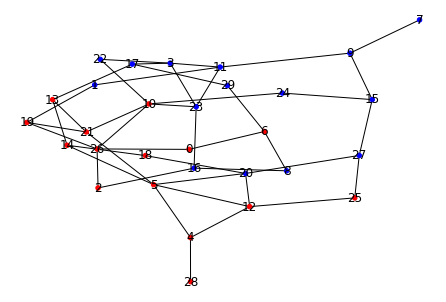

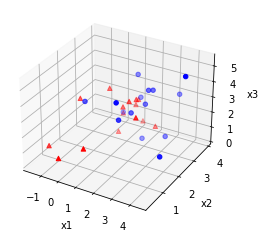

[[-1.58484252  0.9800498   0.63191521]
 [ 2.0395583   2.83114668  0.56211574]
 [-0.13781267  3.1413475   2.90537953]
 [ 1.19974459  3.47582917  3.93891318]
 [ 1.21617256  3.79997743  0.53581779]
 [ 0.67392147  3.10486163  1.95290983]
 [ 0.68710365  0.72819785  1.47140357]
 [ 3.1767622   3.03743082  0.87654035]
 [ 4.10189428  1.62224899  1.2680203 ]
 [ 1.48066995  3.35533593  2.62919368]
 [ 0.89637632  3.68674923  1.64970743]
 [ 1.77788922  1.51662954  4.04345732]
 [ 2.08195706  2.38113215  2.37429203]
 [ 1.11867057  3.60360527  2.14786056]
 [ 0.4711816   3.34303606  1.26708583]
 [ 3.21369682  3.89889984  2.893374  ]
 [ 1.75139122  2.44637394  2.52366926]
 [ 4.41102149  2.79560695  5.38134259]
 [-1.07834242  2.32954002  2.66964214]
 [ 2.14360363  3.57581599  0.68851614]
 [ 1.66425694  1.77726798  2.65347364]
 [ 0.4191674   3.09707331  0.22268276]
 [ 2.07267165  2.98140365  2.70489406]
 [-0.30011717  1.83356702  3.16973041]
 [ 2.15747407  3.08140151  3.54915121]
 [-0.23479887  0.22667804

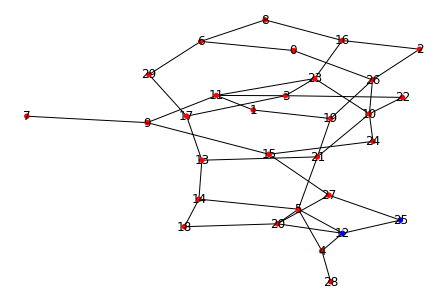

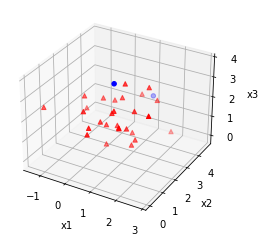

[[ 1.35157677  1.72225535  1.62041844]
 [ 1.2873216   0.90275926  2.93897655]
 [ 1.13514972  2.03969255  3.5800167 ]
 [ 0.78562582  0.02113824  2.43608633]
 [ 0.78686659  2.50589877  2.52784431]
 [ 1.34345812  2.12833299  0.55731707]
 [ 0.61364875  1.62231914  1.61744969]
 [-0.42741795  1.94483626  2.49793495]
 [ 1.50101095  0.84090285  2.23727156]
 [ 2.82308651  0.43059172  3.53051963]
 [ 1.60562589  1.81826653  2.52248979]
 [ 1.0355387   2.80408412  0.67526353]
 [ 1.00193677  1.46779448  3.84576243]
 [ 0.40487523  2.0041759   0.32701518]
 [ 1.67783191  4.71126794 -0.1535439 ]
 [-0.02112747  2.5949394   2.17912013]
 [-1.38727265  0.71356444  2.26551816]
 [ 0.57562598  1.24343064  1.95571277]
 [ 0.89879233  1.90212699  1.51898826]
 [ 0.71829604  0.02804398  2.08755929]
 [ 1.4819149   0.90369444  2.15860374]
 [-0.75691932  2.68944452  1.35851231]
 [ 0.20505733  3.05041433  1.9010607 ]
 [ 1.50212054  2.09678044  0.89855011]
 [ 1.49832929  3.86112218  1.89387942]
 [ 1.80142273  2.89259663

In [31]:
mu1=(1,2,2)
sigma=[[1,0,0],[0,1,0], [0,0,1]]
mu2=(2,3,3)
A=np.array(generate_random_Ad())
for i in range(10):
    W,label=generator(A,mu1,mu2,sigma)
    print(W,label)